# Bike Rental Prediction
## Jeeva Jose C
## Entri Elevate



## Overview of Problem Statement:

Rental bikes have become a common feature in many urban cities, enhancing mobility and convenience for residents and visitors alike. Ensuring the availability and accessibility of rental bikes at the right time is essential to minimize waiting times and improve user satisfaction. This, in turn, highlights the importance of maintaining a stable supply of rental bikes throughout the city. A key challenge lies in accurately predicting the number of bikes needed each hour to meet demand and ensure a seamless rental experience. Hence we perform Regression Analysis on this Data Set.


## Objective

The objective of this project is to predict the number of rental bikes required at each hour based on climatic features.

### Dataset
The dataset for this analysis is publicly available on the UCI Machine Learning Repository at the following link: [https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand].
### Dataset Features

- **Date**: Day-Month-Year.
- **Rented Bike Count**: Count of bikes rented at each hour (target variable).
- **Hour**: Hour of the day (0–23).
- **Temperature**: Temperature in Celsius.
- **Humidity**: Humidity percentage (%).
- **Windspeed**: Wind speed in meters per second (m/s).
- **Visibility**: Visibility in units of 10 meters.
- **Dew Point Temperature**: Dew point temperature in Celsius.
- **Solar Radiation**: Solar radiation in megajoules per square meter (MJ/m²).
- **Rainfall**: Rainfall in millimeters (mm).
- **Snowfall**: Snowfall in centimeters (cm).
- **Seasons**: Categorical variable representing the season (Winter, Spring, Summer, Autumn).
- **Holiday**: Indicates whether the day is a hoiday (Holiday/ No holiday)
- **Functioning Day**: Represents whether the hour is functional (Yes/No)



#### Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from joblib  import dump, load
from scipy.stats import uniform
from sklearn.pipeline import Pipeline

#### Loading the Dataset
Load the dataset and inspect its structure and features.

In [2]:
# Detect the encoding
import chardet
with open('BikeRental.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])

# Use the detected encoding
df = pd.read_csv('BikeRental.csv', encoding=result['encoding'])

ISO-8859-1


In [3]:
df = pd.read_csv('BikeRental.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [6]:
# getting information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Data Preprocessing - Data Cleaning:

In [7]:
#Checking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no missing values

In [8]:
#Checking for Duplicates
df.duplicated().sum()

0

There are no duplicate entries

In [9]:
#Getting data types of each columns
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [10]:
#Obtain ststistical summary of numerical columns
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


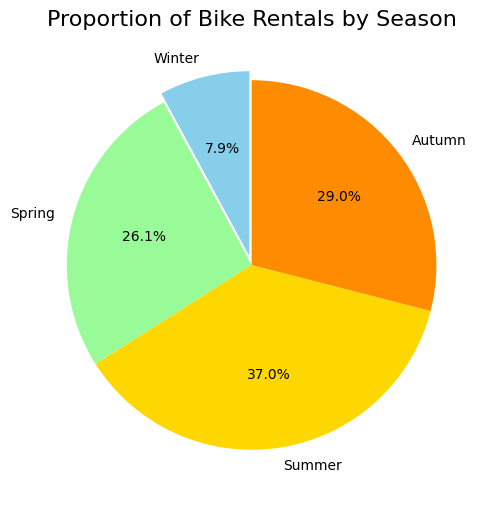

In [11]:
# Proportion of Bike Rentals by Season

seasonal_rentals = df.groupby('Seasons')['Rented Bike Count'].sum()

# Define season order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_rentals = seasonal_rentals.reindex(season_order)

# Plotting the pie chart
plt.figure(figsize=(6, 6))
colors = ['#87CEEB', '#98FB98', '#FFD700', '#FF8C00']  # Colors for each season
plt.pie(
    seasonal_rentals,
    labels=seasonal_rentals.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05, 0, 0, 0]  # Slightly explode the first slice (optional)
)

# Add title
plt.title('Proportion of Bike Rentals by Season', fontsize=16)

# Show plot
plt.show()

Pie chart indicates the relevance of 4 seasons in the data set.

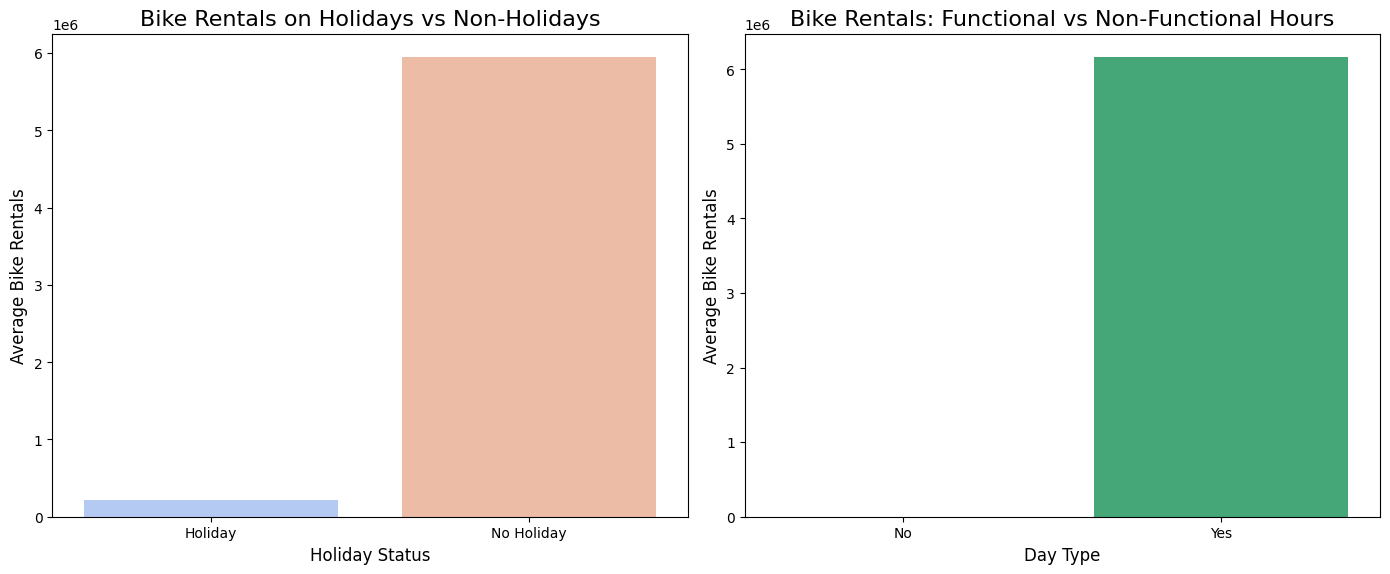

In [12]:
#Understand the distribution of Holiday and Functioning

# Group data by Holiday and Functioning Day to calculate total rentals
holiday_rentals = df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
functional_rentals = df.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Holiday vs Non-Holiday
sns.barplot(x='Holiday', y='Rented Bike Count', hue='Holiday', data=holiday_rentals, ax=axes[0], palette='coolwarm')
axes[0].set_title('Bike Rentals on Holidays vs Non-Holidays', fontsize=16)
axes[0].set_ylabel('Average Bike Rentals', fontsize=12)
axes[0].set_xlabel('Holiday Status', fontsize=12)

# Plot Functional vs Non-Functional Hours
sns.barplot(x='Functioning Day', y='Rented Bike Count', hue='Functioning Day', data=functional_rentals, ax=axes[1], palette='viridis')
axes[1].set_title('Bike Rentals: Functional vs Non-Functional Hours', fontsize=16)
axes[1].set_ylabel('Average Bike Rentals', fontsize=12)
axes[1].set_xlabel('Day Type', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

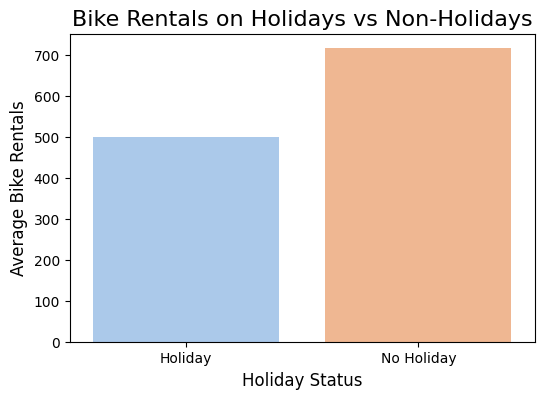

In [13]:
# Group data by Holiday and calculate mean rentals
holiday_rentals = df.groupby('Holiday')['Rented Bike Count'].mean().reset_index()

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Holiday', y='Rented Bike Count', data=holiday_rentals, hue='Holiday', palette='pastel')
plt.title('Bike Rentals on Holidays vs Non-Holidays', fontsize=16)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.xlabel('Holiday Status', fontsize=12)
plt.show()

The above two visualisations shows that Functioning day column is irrelevant as non functioning day indicates 0 bikes rented. Holiday columns has high total rented for 'No Holiday'. But Mean Comparison reveals importance of both category.

In [14]:
# Droping column 'Functioning Day' due to its irrelevance
df1=df.drop(columns=['Functioning Day'])

In [15]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [16]:
#Ensure the 'Date' column is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')

#Extract the month
df1['Month'] = df1['Date'].dt.month

Month is extracted from the date column before dropping the date column

In [17]:
df1=df1.drop(columns=['Date'])

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Month                      8760 non-null   int32  
dtypes: float64(6), int32(1), int64(4), object(2)
mem

## Exploratory Data Analysis (EDA):

In [19]:
# collect numeric columns to a new data frame 'numeric_columns'
numeric_columns=df1.select_dtypes(include=['number'])

In [20]:
print(numeric_columns.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month'],
      dtype='object')


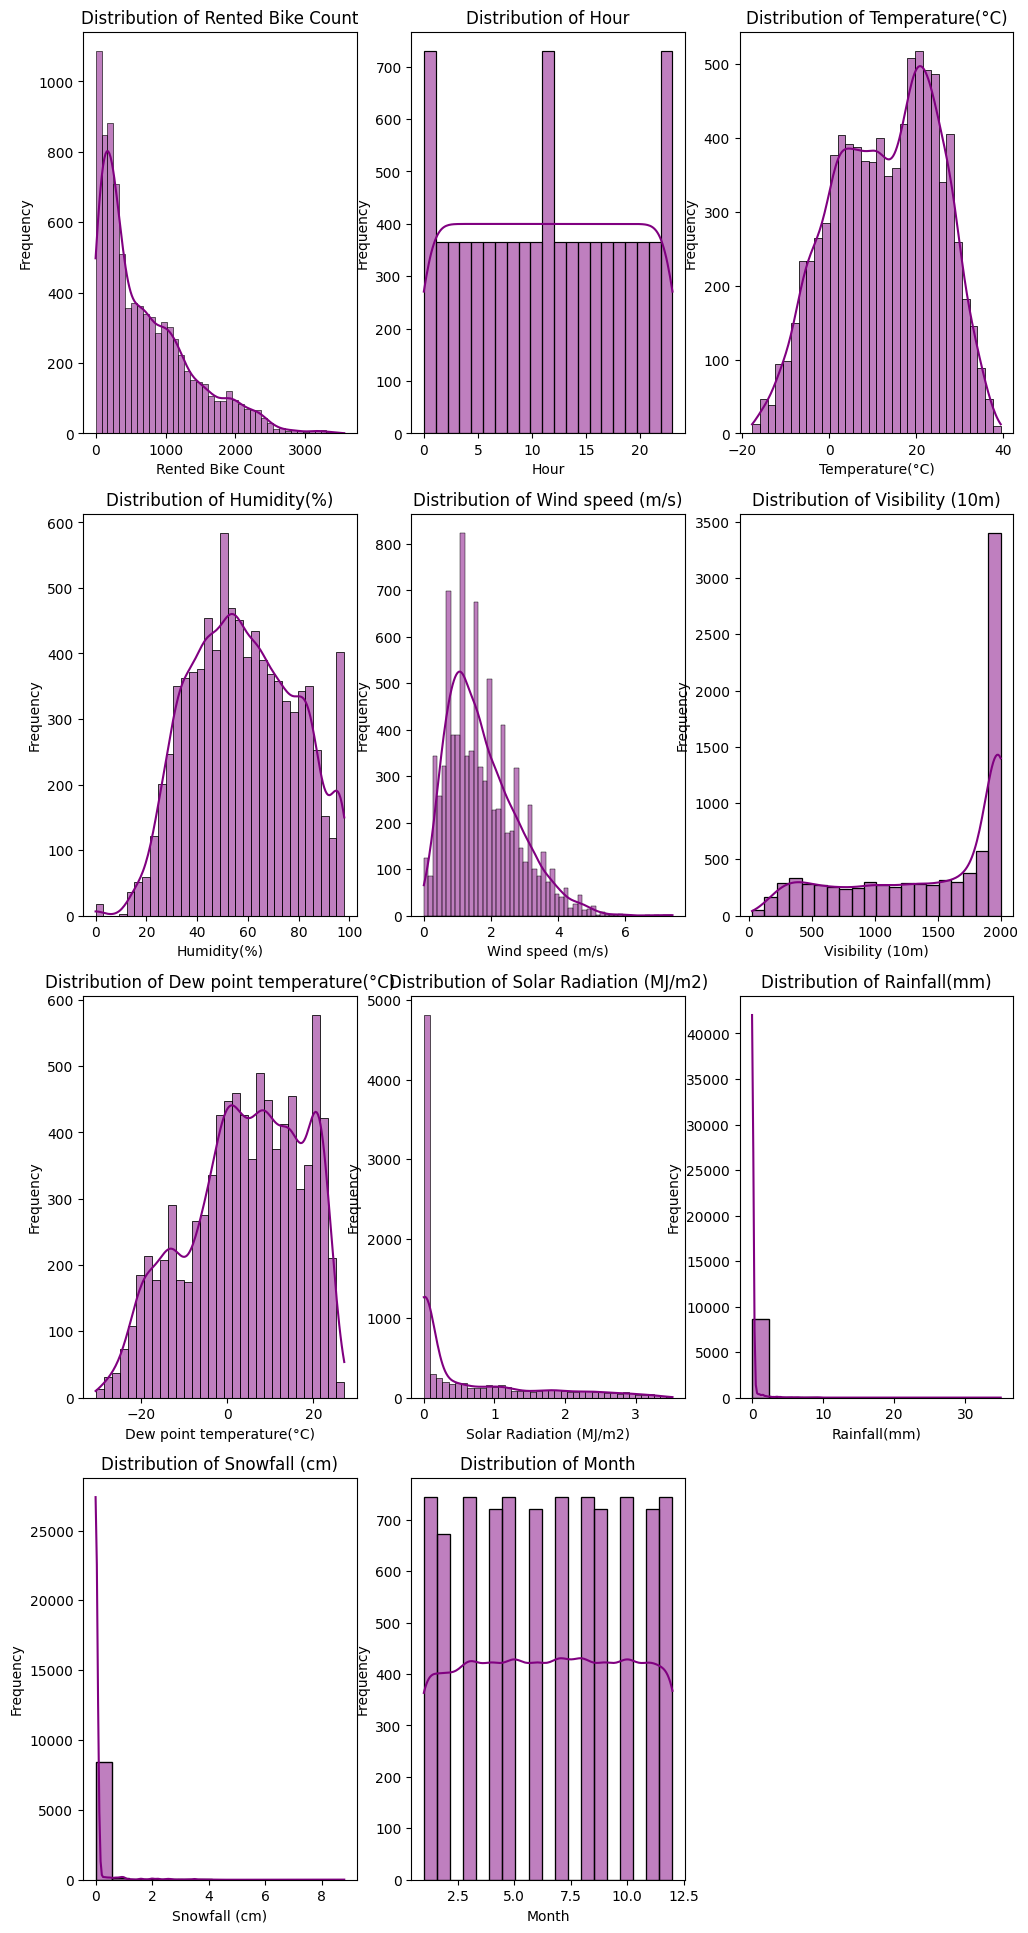

In [21]:
# Distribution plot of numeric colums

plt.figure(figsize=(12, 24))
for i, col in enumerate (numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x=df1[col], kde= True, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')  # Set the label for the x-axis
    plt.ylabel('Frequency') 
plt.show()

Distributions of Month and Hour indicate that they are behaving as Categorical values. And all columns show skewness.

In [22]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,12


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Month                      8760 non-null   int32  
dtypes: float64(6), int32(1), int64(4), object(2)
mem

In [24]:
# Define new set of numeric columns Eliminating  Hour and Month
numeric_new=numeric_columns.drop(columns=['Hour','Month'])

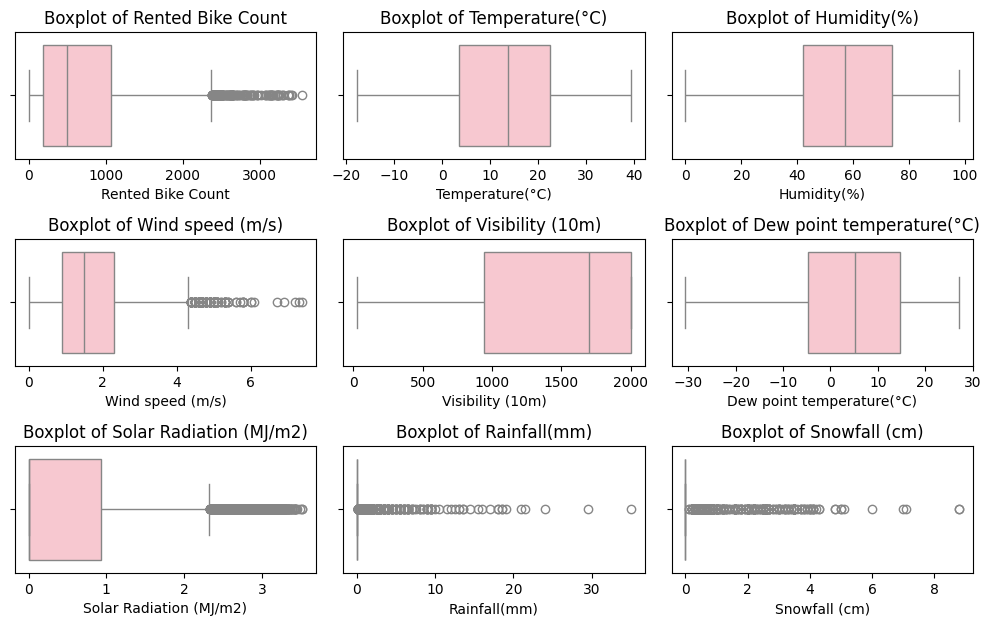

In [25]:
#plot boxplot of numerical columns to understand outliers
plt.figure(figsize=(10,8))
for i, col in enumerate (numeric_new, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df1[col], color='pink')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

For Rain Fall and Snow fall, 75 percentage of value is 0 which is the minimum value itself which indicates the need of seperate handling of these two columns from other columns.



In [26]:
# Handling Outliers 
numeric_1 = numeric_new.drop(columns=['Rainfall(mm)', 'Snowfall (cm)']) # Exclude Rainfall(mm) and Snowfall(cm)
numeric_cols = numeric_1.columns  
special_cols = ['Rainfall(mm)', 'Snowfall (cm)']


def handle_outliers_combined(data, numeric_cols, special_cols):
    # Handle outliers for numeric_cols using capping
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        
        # Cap the outliers
        data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    
    # Handle outliers for special_cols using capping
    for col in special_cols:
        Q1 = data[col].quantile(0.01)
        Q3 = data[col].quantile(0.99)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        
        
        # Replace outliers with the mean
        data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    
    return data


df1 = handle_outliers_combined(df1, numeric_cols, special_cols)


In [27]:
numeric_new.shape


(8760, 9)

In [28]:
# Check skewness of numerical columns
print(df1[numeric_new.columns].skew())

Rented Bike Count            1.003266
Temperature(°C)             -0.198326
Humidity(%)                  0.059579
Wind speed (m/s)             0.714700
Visibility (10m)            -0.701786
Dew point temperature(°C)   -0.367298
Solar Radiation (MJ/m2)      1.267346
Rainfall(mm)                 8.962051
Snowfall (cm)                7.641428
dtype: float64


In [29]:
# Handle the skewness of numeric columns
def apply_yeo_johnson(data, numeric):
    
    # Apply Yeo-Johnson transformation
    data[numeric] = power_transform(data[numeric], method='yeo-johnson')
    return data

# Apply the transformation
numeric = numeric_new.columns
df1 = apply_yeo_johnson(df1, numeric)
print("Skewness after transformation is:\n")
print(df1[numeric_new.columns].skew())

Skewness after transformation is:

Rented Bike Count           -0.140727
Temperature(°C)             -0.234084
Humidity(%)                 -0.068317
Wind speed (m/s)            -0.002993
Visibility (10m)            -0.520803
Dew point temperature(°C)   -0.124635
Solar Radiation (MJ/m2)      0.550148
Rainfall(mm)                 3.712452
Snowfall (cm)                4.103145
dtype: float64


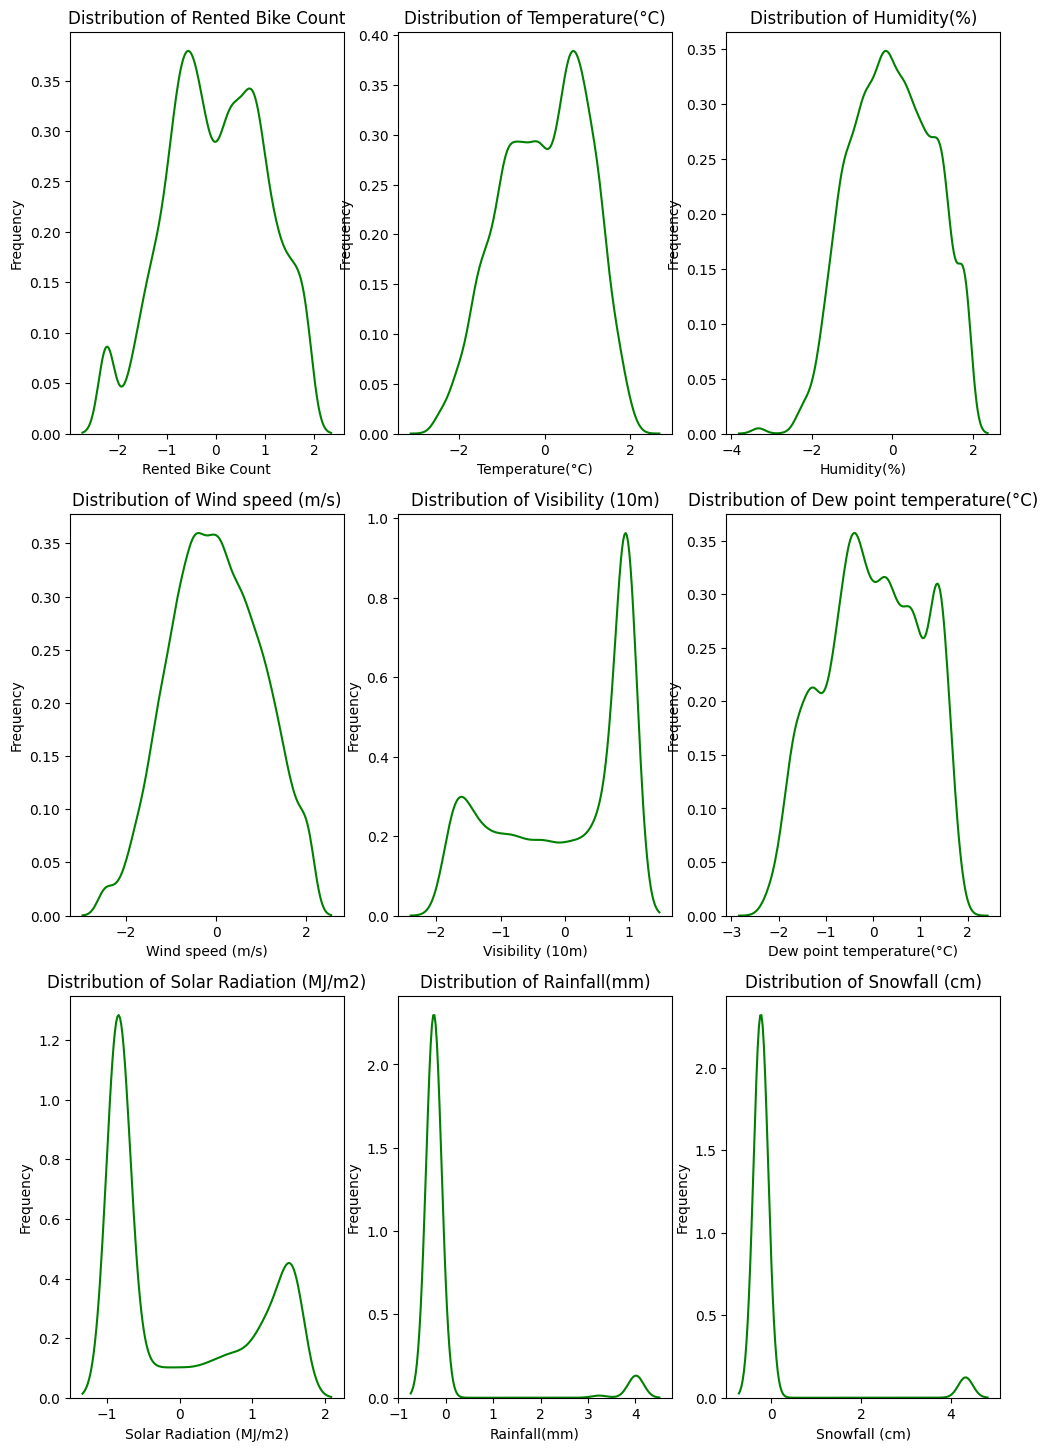

In [30]:
#Distribution plot after outlier handling and transformation
plt.figure(figsize=(12, 24))
for i, col in enumerate (numeric_new, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(df1[col], color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')  # Set the label for the x-axis
    plt.ylabel('Frequency') 
plt.show()

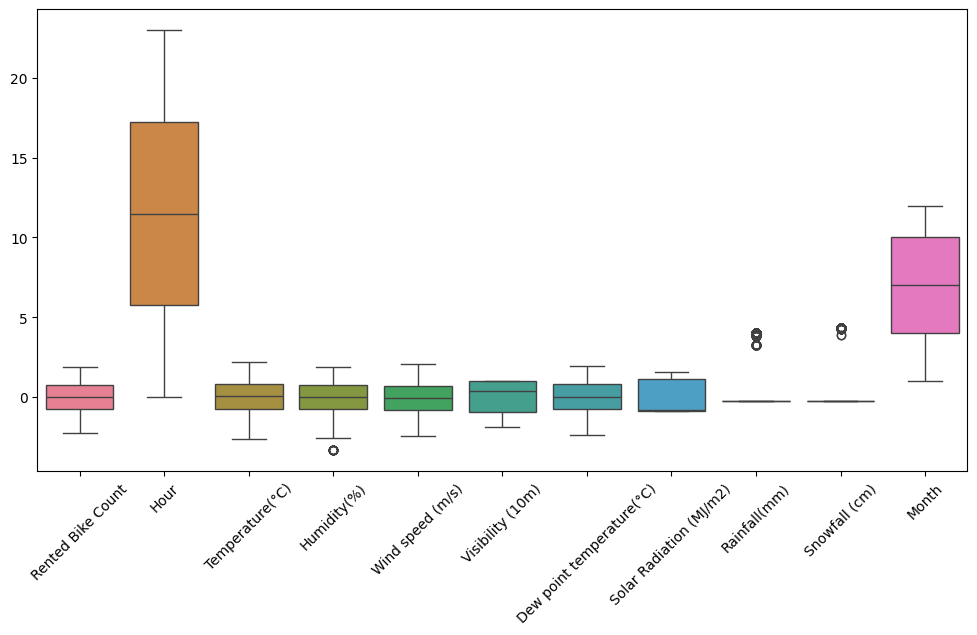

In [31]:
#plot boxplot of numerical columns to understand outliers
plt.figure(figsize=(12,6))
sns.boxplot(df1)
plt.xticks(rotation=45) 
plt.show()    

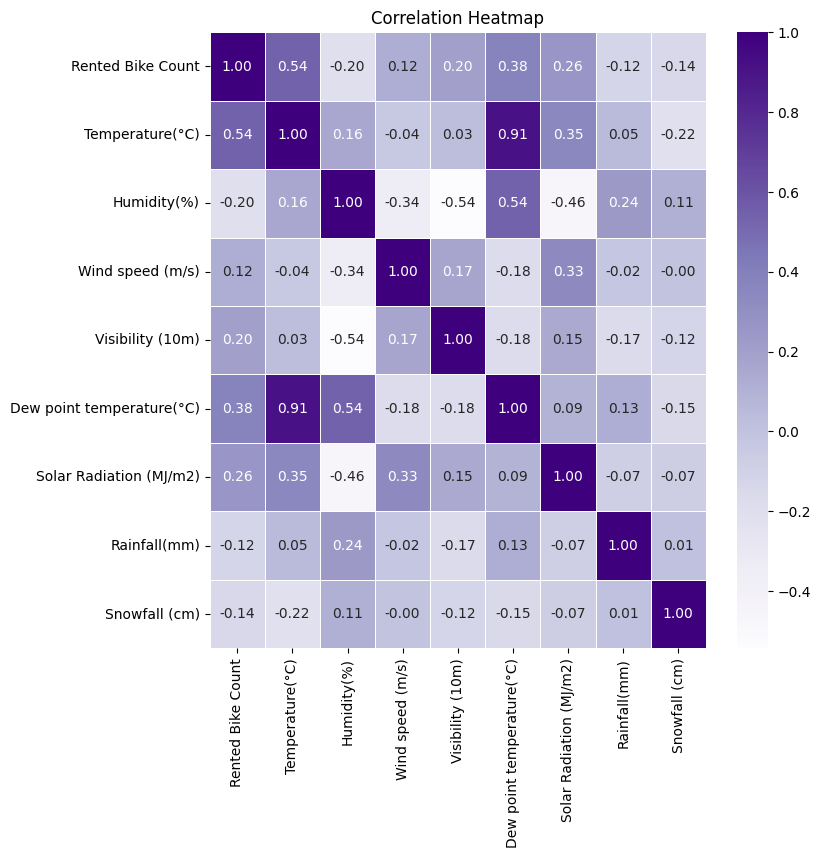

In [32]:
# Getting Correlation between numeric columns

correlation_matrix = numeric_new.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap')
plt.show()



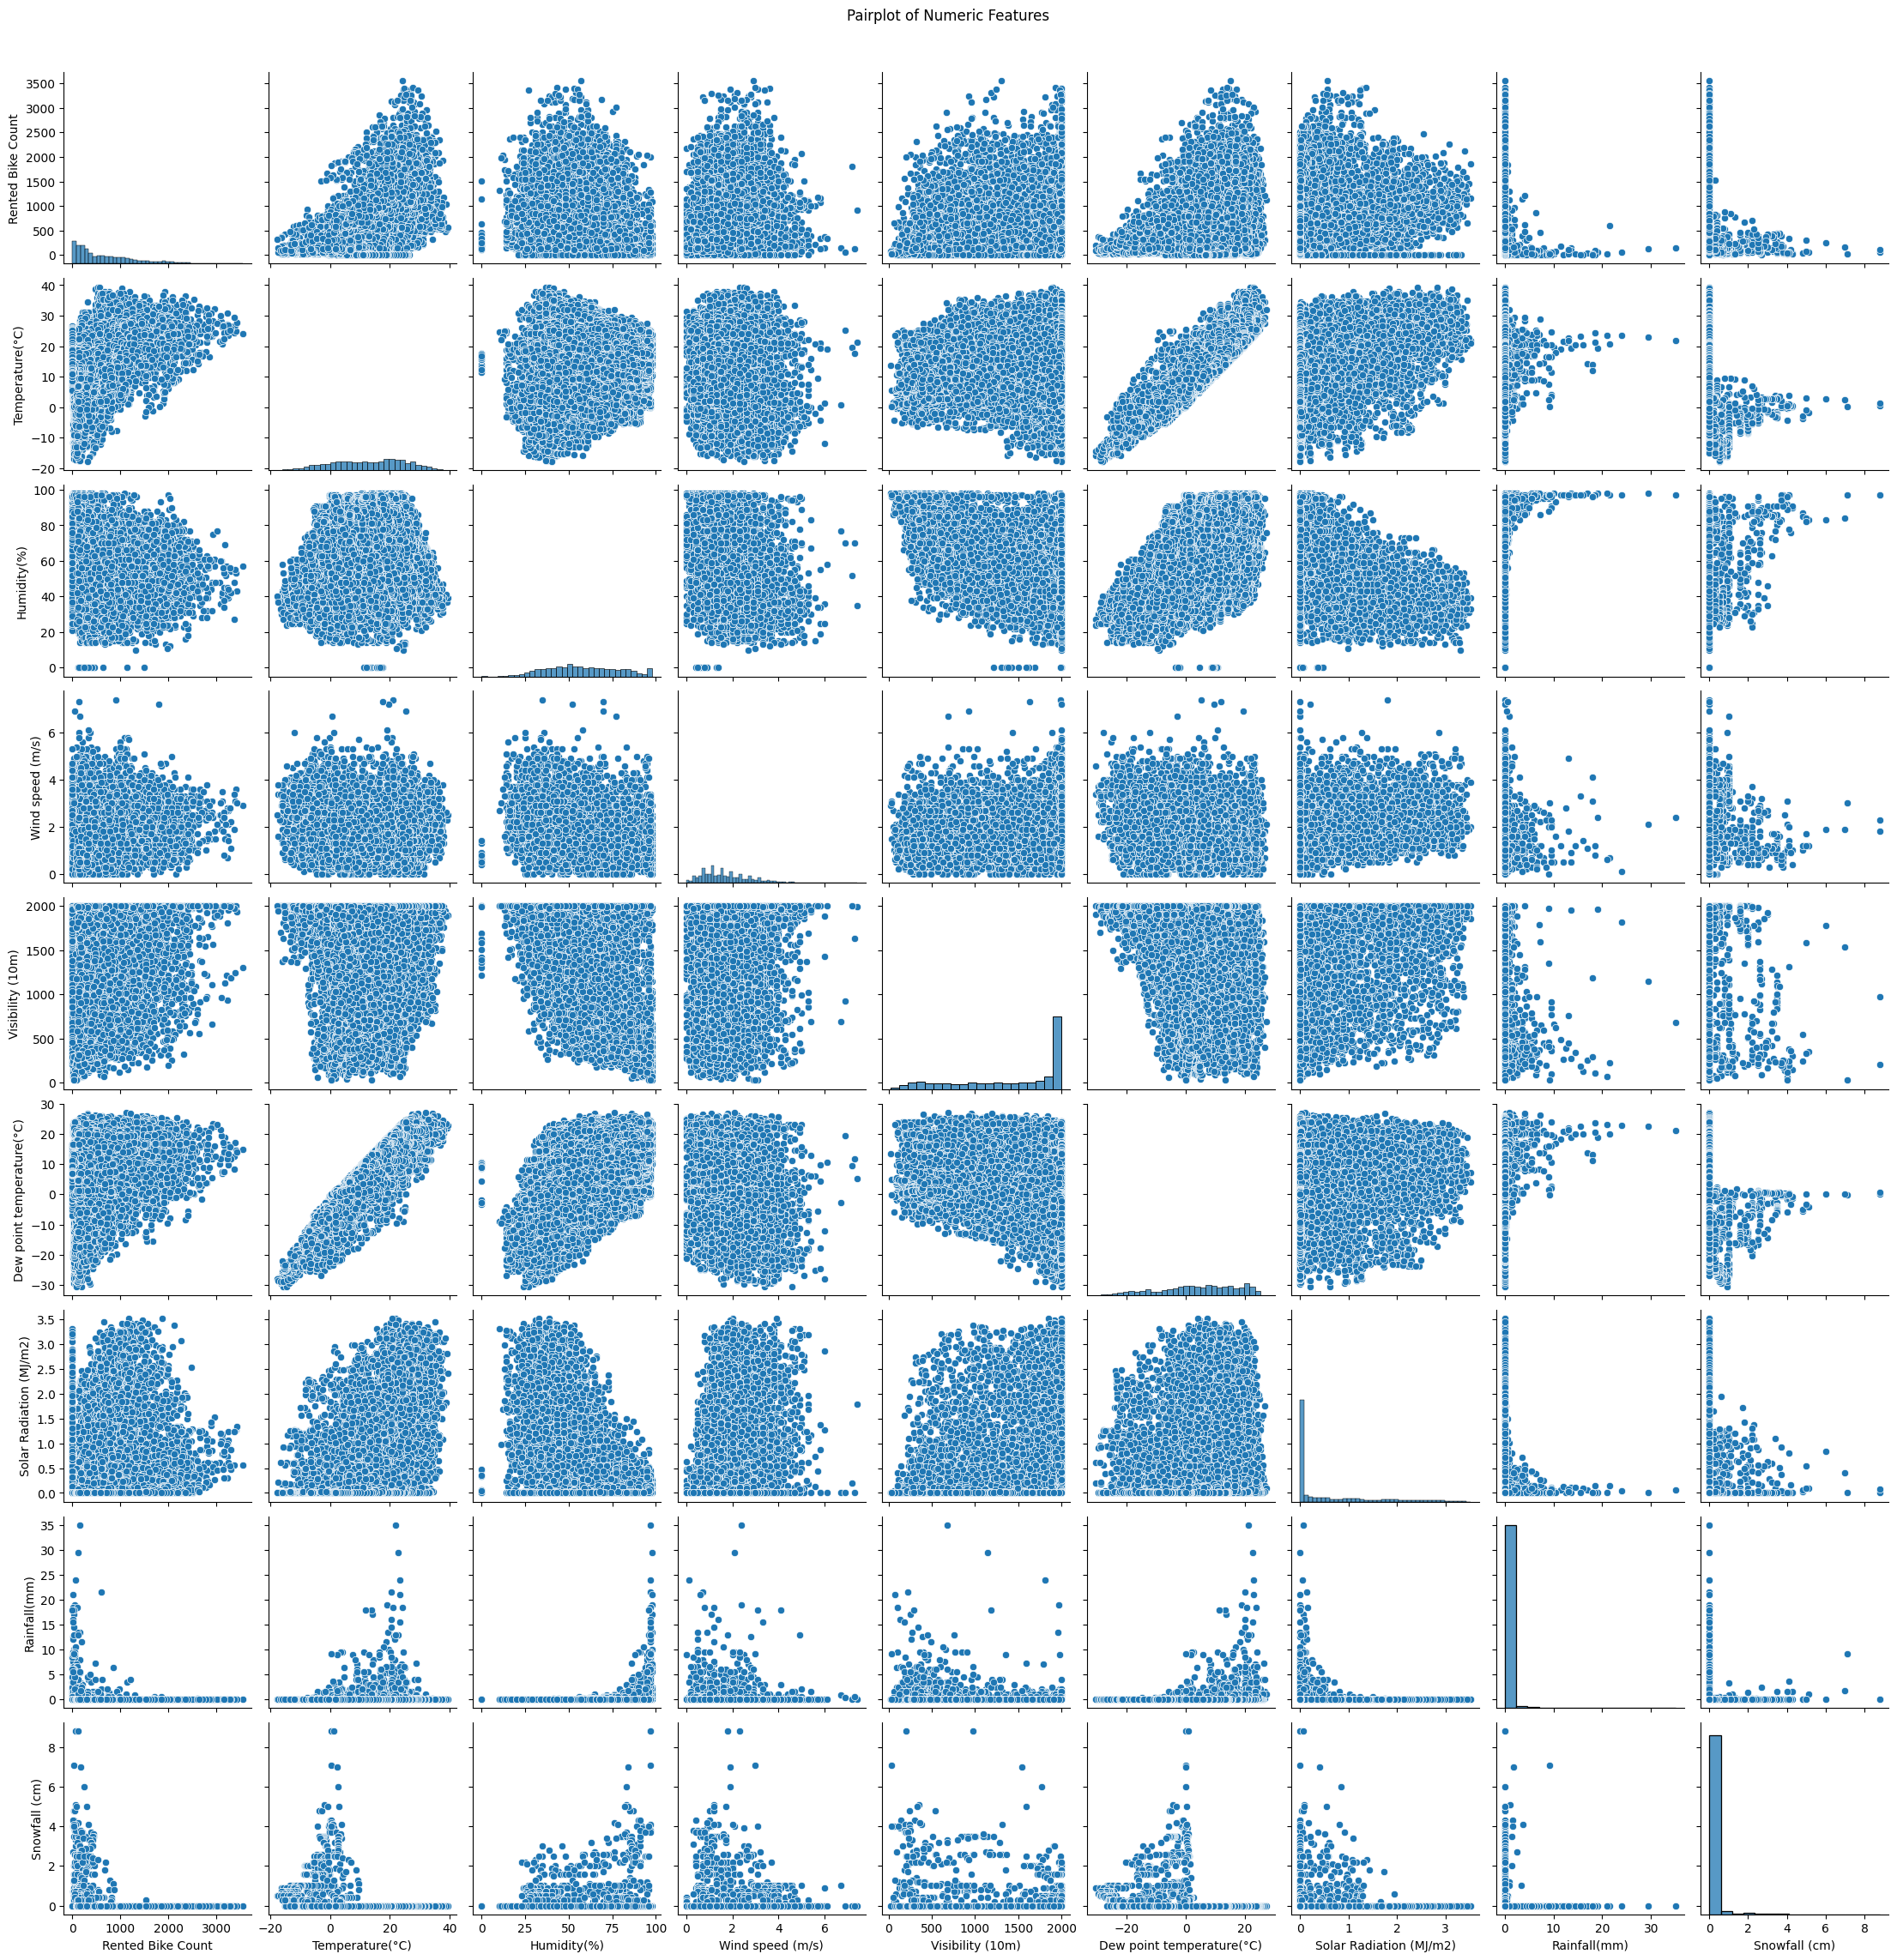

In [33]:
# Create a pairplot to visualize pairwise relationships
sns.pairplot(numeric_new)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

## Feature Engineering

In [34]:

#  One-Hot Encoding for 'Seasons' and 'Holiday'
df_encoded = pd.get_dummies(df1, columns=['Seasons'])
df_encoded = pd.get_dummies(df_encoded, columns=['Holiday'], drop_first=True)


In [35]:
#Dataframe informations after encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   float64
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   float64
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Month                      8760 non-null   int32  
 11  Seasons_Autumn             8760 non-null   bool   
 12  Seasons_Spring             8760 non-null   bool   
 13  Seasons_Summer             8760 non-null   bool 

In [36]:
# Separate features (X) and target variable (y)
X=df_encoded.drop('Rented Bike Count',axis=1)
y=df_encoded['Rented Bike Count']

## Feature Selection

In [37]:
#Feature Selection Using from SelectKBest, f_regression

def perform_feature_selection(X, y, k):
    # Initialize SelectKBest with f_classif scoring function
    selector = SelectKBest(score_func=f_regression, k=k)
    
    # Fit and transform the training data
    X_selected = selector.fit_transform(X, y)
    
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = X.columns[selected_features_mask]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    return X_selected, selected_features, feature_scores

In [38]:
# Perform feature selection
k_features = 10
X_selected, selected_features, feature_scores = perform_feature_selection(
    X, y, k=k_features
)

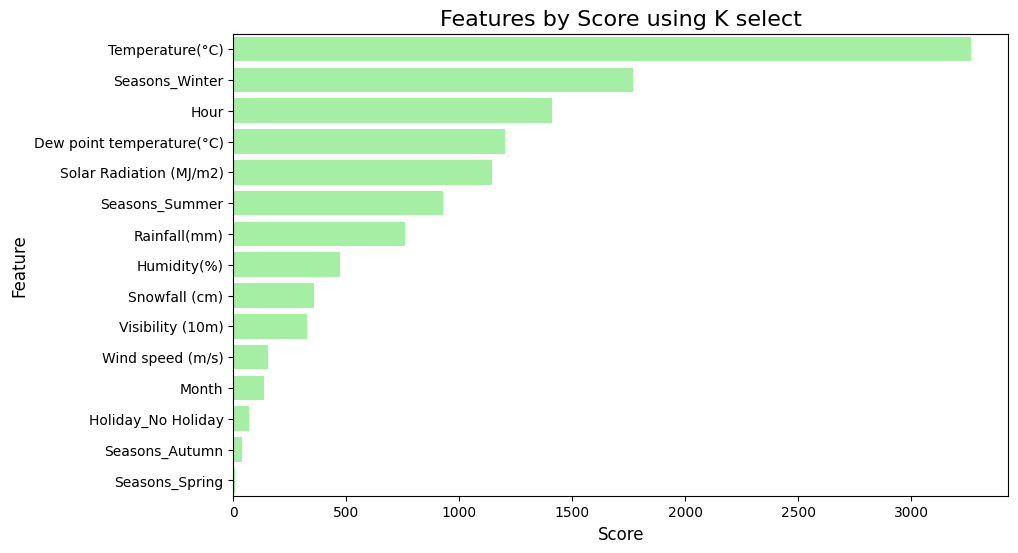

In [39]:
# Create a bar plot based on the score of features
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, color= '#98FB98' )
plt.title(f"Features by Score using K select", fontsize=16)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


In [40]:
# print the slected top k features along with their score
print("\nTop 10 Selected Features:")
print("-" * 50)
for i, feature in enumerate(selected_features, 1):
    score = feature_scores[feature_scores['Feature'] == feature]['Score'].values[0]
    print(f"{i}. {feature}: {score:.2f}")


Top 10 Selected Features:
--------------------------------------------------
1. Hour: 1410.87
2. Temperature(°C): 3265.61
3. Humidity(%): 470.95
4. Visibility (10m): 324.48
5. Dew point temperature(°C): 1201.18
6. Solar Radiation (MJ/m2): 1142.73
7. Rainfall(mm): 759.18
8. Snowfall (cm): 358.69
9. Seasons_Summer: 928.75
10. Seasons_Winter: 1769.35
